## Anomaly detection in Ambient_temperature_system_failure (NAB)

This dataset is from Numenta Anomaly Benchmark (NAB).This datasetconsits of two columns one in timestamp and other is ambient temperature in an office. Here we need to detect any anomaly in ambient temperature.

In [1]:
# Importing library
from IntelliMaint.model_development import LSTM_NN  # LSTM class
from IntelliMaint.model_development import dp  # data preperocessing
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
data=pd.read_csv('C:/Users/Admin/data/NAB/ambient_temperature_system_failure.csv')

In [3]:
print(data)
data=data.drop(['timestamp'],axis=1)

            timestamp      value
0       7/4/2013 0:00  69.880835
1       7/4/2013 1:00  71.220227
2       7/4/2013 2:00  70.877805
3       7/4/2013 3:00  68.959400
4       7/4/2013 4:00  69.283551
...               ...        ...
7262  5/28/2014 11:00  72.370206
7263  5/28/2014 12:00  72.172956
7264  5/28/2014 13:00  72.046565
7265  5/28/2014 14:00  71.825226
7266  5/28/2014 15:00  72.584089

[7267 rows x 2 columns]


### Data preprocessing:

Here, data is preprocessed for developing LSTM model. First a 'pre_process' object is created by calling data pre-processing class from intellimaint, where target column is defined with suitable scaling method. Pre_process object has 'sequential_preprocess' method which takes input like lookback or timestamp and forward steps, results in 3D scaled input with train, test and validation data.

In [4]:
pre_process=dp(data,target_names=['value'], scale='StandardScaler',random_shuffle=False)
scaled_data,scaler=pre_process.sequential_preprocess(forward_steps=0,lookback=3) # create scaled input as dictionary format  


### Model development:

Once data is preprocessed and scaled then it passes into LSTM_NN class for training model. Here, in create model we can define model architecture like numbers of neurons, activation function, dropout etc. Once model is generated, it is trained using train api.





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 3, 100)            40800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 100)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 80)                57920     
_________________________________________________________________
dropout_2 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 81        
Total params: 98,801
Trainable params: 98,801
Non-trainable params: 0
_________________________________________________________________
-------------------

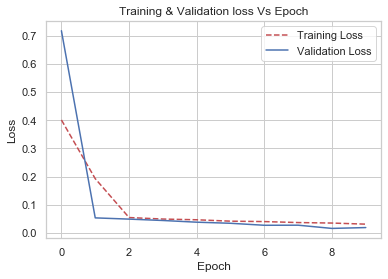

In [5]:
lstm=LSTM_NN(scaled_data)
model=lstm.create_model()
mu,sigma,RE_train,models,model_history=lstm.train(model,scaler,optimizer='adam',epoch=10)

### Model Predection:

Once model is trained it can be used for model prediction. A reconstruction error plot is generated for the target column.

(7264, 1, 1)
(7264, 1)
7264/7264 [==============================] - 123s 17ms/step
Prediction loss: 0.022131394006164196
Prediction accuracy: 0.022131394006164196


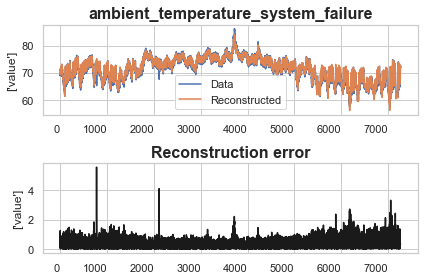

In [7]:
%matplotlib inline
lstm_pred=LSTM_NN(data)
RE,pr=lstm_pred.prediction(models,scaler,plot_title='ambient_temperature_system_failure',plot_column_num=1)
plt.show()